In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy import optimize

In [2]:
df = pd.read_csv('HeightsWeights.csv', index_col='Index')

In [3]:
df.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [4]:
df.dtypes

Height    float64
Weight    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  25000 non-null  float64
 1   Weight  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


In [6]:
# summary statistics
df.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [7]:
# correlation
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


Text(0, 0.5, 'Count')

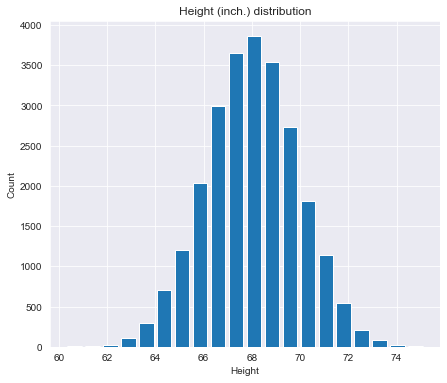

In [8]:
plt.figure(figsize=(7, 6))
plt.hist(df['Height'], bins=20, rwidth=0.8)
plt.title('Height (inch.) distribution')
plt.xlabel('Height')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

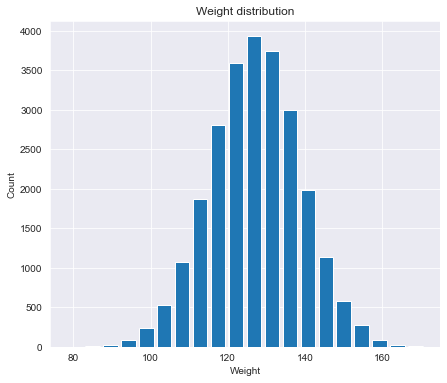

In [9]:
plt.figure(figsize=(7, 6))
plt.hist(df['Weight'], bins=20, rwidth=0.8)
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Count')

C:\Users\Porti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

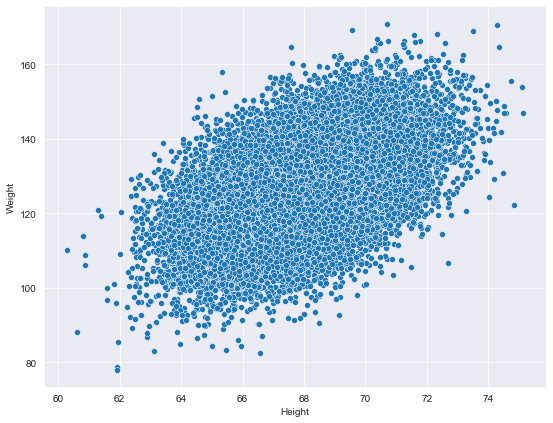

In [10]:
plt.figure(figsize=(9, 7))
sns.scatterplot(df['Height'], df['Weight'])

In [11]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [12]:
df['BMI'] = df.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

In [13]:
df.head()

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


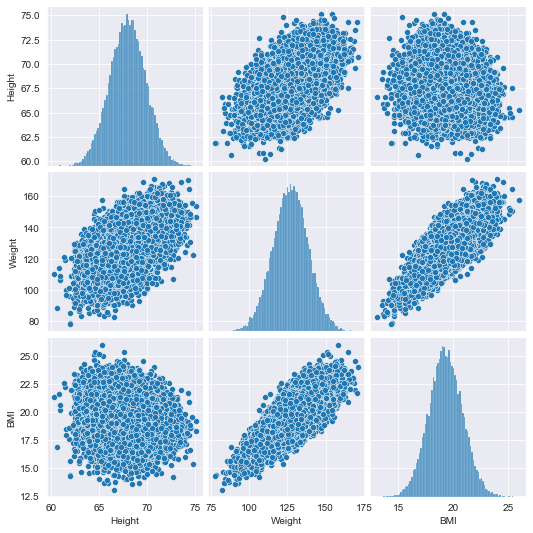

In [14]:
sns.pairplot(df[['Height', 'Weight', 'BMI']])

In [15]:
def mse(w0, w1):
    error = 0.0
    for i in range(len(df)):
        error += (df.iloc[i]['Height'] - (w0 + w1 * df.iloc[i]['Weight'])) ** 2
    return error

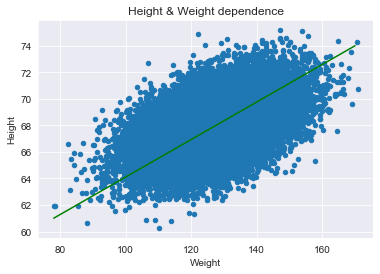

In [16]:
w1_opt = optimize.minimize_scalar(lambda w1: mse(50, w1), bounds=[-5, 5]).x

df.plot(x='Weight', y='Height', kind='scatter', title='Height & Weight dependence')

x = np.arange(min(df['Weight']), max(df['Weight']))
y = 50.0 + w1_opt * x
plt.plot(x, y, 'g')
plt.show()

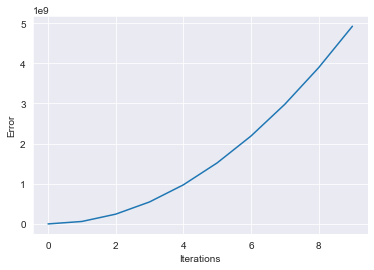

In [17]:
# Show a graph showing the change in the algorithm's error value with the number of iterations.
def error_plot(w0, w1, num_iter):
    error = []
    for i in range(num_iter):
        error.append(mse(w0, w1))
        w1 = w1 - 0.01 * 2 * df['BMI'].mean()
    plt.plot(range(num_iter), error)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()


error_plot(50, w1_opt, 10)

In [18]:
# Using the Scikit-learn library tools, perform a single split of the original set data (weight and height values) into training and test samples in a 70/30 ratio. Consider weight values as a feature, height values as a target variable.

X = df.iloc[:, 1:2].values
y = df.iloc[:, 2:3].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Gradient Descent method:
Mean squared error: 0.88
Coefficients: [[0.10558007]]
Intercept: [5.90998789]



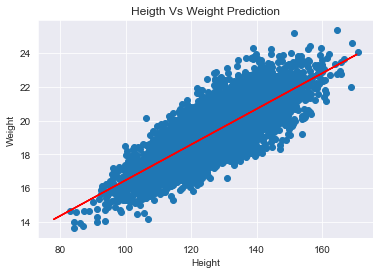

Stochastic Gradient Descent method:
Mean squared error: 0.88
Coefficients: [[0.10558007]]
Intercept: [5.90998789]



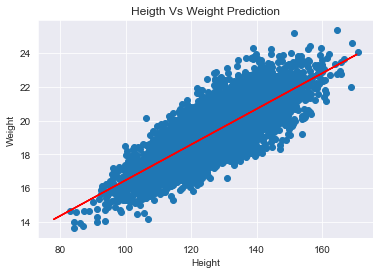

In [19]:
# On the training sample, train two linear regression models: using the gradient descent method and the stochastic gradient descent method.

def train_model(X_train, y_train, method):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('{} method:'.format(method))
    print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
    print('Coefficients: {}'.format(model.coef_))
    print('Intercept: {}'.format(model.intercept_))
    print()

    plt.scatter(X_test, y_test)
    plt.plot(X_train, model.predict(X_train), color='r')
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.title("Heigth Vs Weight Prediction")
    plt.show()


train_model(X_train, y_train, 'Gradient Descent')
train_model(X_train, y_train, 'Stochastic Gradient Descent')